In [1]:
#Imports
import pandas as pd
import csv
from api_keys import census_api
import json
import requests
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

In [2]:
#Input
traffic_data = "./Resources/US_Accidents_March23.csv"

In [3]:
traffic_df=pd.read_csv(traffic_data)
traffic_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
#Creating DataFrame w/ reduced columns
reduced_traffic_df = traffic_df[["Start_Time","End_Time","Severity","City","State","Weather_Condition",
                                 "Temperature(F)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)",\
                                 "Sunrise_Sunset","Description","Bump","Crossing", "Give_Way","Junction",\
                                 "No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming",\
                                 "Traffic_Signal","Turning_Loop","Description"
                                ]]
reduced_traffic_df.shape

(7728394, 25)

In [5]:
#Using function to parse date and convert to strint
def parse_time(raw):
    date = dt.datetime.fromisoformat(raw).date()
    string = date.isoformat()
    return string

In [6]:
reduced_traffic_df.loc[:, "Start_Date"] = reduced_traffic_df['Start_Time'].map(parse_time)
reduced_traffic_df.loc[:, "End_Date"] = reduced_traffic_df['End_Time'].map(parse_time)

C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\4217142928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_traffic_df.loc[:, "Start_Date"] = reduced_traffic_df['Start_Time'].map(parse_time)
C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\4217142928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_traffic_df.loc[:, "End_Date"] = reduced_traffic_df['End_Time'].map(parse_time)


In [7]:
#using function to extract Year from date
def year(raw):
    year_string = raw[:4]
    year_integer = int(year_string)
    return year_integer  

In [8]:
reduced_traffic_df.loc[:, "Start_Year"] = reduced_traffic_df['Start_Date'].map(year)
reduced_traffic_df.loc[:, "End_Year"] = reduced_traffic_df['End_Date'].map(year)

C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3843608378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_traffic_df.loc[:, "Start_Year"] = reduced_traffic_df['Start_Date'].map(year)
C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3843608378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_traffic_df.loc[:, "End_Year"] = reduced_traffic_df['End_Date'].map(year)


In [9]:
#dropping NA from df
drop_traffic_df = reduced_traffic_df.dropna(how='any')
drop_traffic_df.shape

(5382749, 29)

In [10]:
#Using function to format the drop traffic dataframe
drop_traffic_df.loc[:, "Start_Date"] = drop_traffic_df['Start_Time'].map(parse_time)
drop_traffic_df.loc[:, "End_Date"] = drop_traffic_df['End_Time'].map(parse_time)
drop_traffic_df.loc[:, "Start_Year"] = drop_traffic_df['Start_Date'].map(year)
drop_traffic_df.loc[:, "End_Year"] = drop_traffic_df['End_Date'].map(year)
drop_traffic_df.shape

C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3689601372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_traffic_df.loc[:, "Start_Date"] = drop_traffic_df['Start_Time'].map(parse_time)
C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3689601372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_traffic_df.loc[:, "End_Date"] = drop_traffic_df['End_Time'].map(parse_time)
C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3689601372.py:4: SettingWithCopyWarning: 
A value is trying t

(5382749, 29)

In [11]:
#reorganizing columns
organized_traffic_df = reduced_traffic_df[["Start_Year","Start_Date","End_Year","End_Date","Start_Time","End_Time",\
                                        "Severity","City","State","Weather_Condition","Temperature(F)","Visibility(mi)",\
                                        "Wind_Speed(mph)","Precipitation(in)","Sunrise_Sunset","Description","Bump",\
                                        "Crossing", "Give_Way","Junction","No_Exit","Railway","Roundabout","Station",\
                                        "Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]]
organized_traffic_df.head()

,Start_Year,Start_Date,End_Year,End_Date,Start_Time,End_Time,Severity,City,State,Weather_Condition,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2016,2016-02-08,2016,2016-02-08,2016-02-08 05:46:00,2016-02-08 11:00:00,3,Dayton,OH,Light Rain,...,False,False,False,False,False,False,False,False,False,False
1,2016,2016-02-08,2016,2016-02-08,2016-02-08 06:07:59,2016-02-08 06:37:59,2,Reynoldsburg,OH,Light Rain,...,False,False,False,False,False,False,False,False,False,False
2,2016,2016-02-08,2016,2016-02-08,2016-02-08 06:49:27,2016-02-08 07:19:27,2,Williamsburg,OH,Overcast,...,False,False,False,False,False,False,False,False,True,False
3,2016,2016-02-08,2016,2016-02-08,2016-02-08 07:23:34,2016-02-08 07:53:34,3,Dayton,OH,Mostly Cloudy,...,False,False,False,False,False,False,False,False,False,False
4,2016,2016-02-08,2016,2016-02-08,2016-02-08 07:39:07,2016-02-08 08:09:07,2,Dayton,OH,Mostly Cloudy,...,False,False,False,False,False,False,False,False,True,False


In [12]:
organized_traffic_gp = organized_traffic_df.groupby(["Start_Year"]).count()
organized_traffic_gp

,Start_Date,End_Year,End_Date,Start_Time,End_Time,Severity,City,State,Weather_Condition,Temperature(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Start_Year,,,,,,,,,,,,,,,,,,,,,
2016,410821,410821,410821,410821,410821,410821,410794,410821,402264,404372,...,410821,410821,410821,410821,410821,410821,410821,410821,410821,410821
2017,718093,718093,718093,718093,718093,718093,718066,718093,700543,703703,...,718093,718093,718093,718093,718093,718093,718093,718093,718093,718093
2018,893426,893426,893426,893426,893426,893426,893416,893426,871904,875415,...,893426,893426,893426,893426,893426,893426,893426,893426,893426,893426
2019,954303,954303,954303,954303,954303,954303,954284,954303,936077,937178,...,954303,954303,954303,954303,954303,954303,954303,954303,954303,954303
2020,1178913,1178913,1178913,1178913,1178913,1178913,1178863,1178913,1148939,1147949,...,1178913,1178913,1178913,1178913,1178913,1178913,1178913,1178913,1178913,1178913
2021,1563753,1563753,1563753,1563753,1563753,1563753,1563700,1563753,1531440,1531731,...,1563753,1563753,1563753,1563753,1563753,1563753,1563753,1563753,1563753,1563753
2022,1762452,1762452,1762452,1762452,1762452,1762452,1762387,1762452,1723764,1723734,...,1762452,1762452,1762452,1762452,1762452,1762452,1762452,1762452,1762452,1762452
2023,246633,246633,246633,246633,246633,246633,246631,246633,240004,240459,...,246633,246633,246633,246633,246633,246633,246633,246633,246633,246633


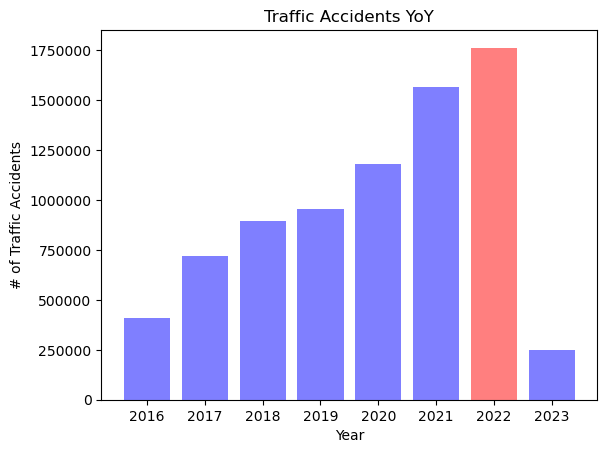

In [13]:
x_axis=organized_traffic_gp.index.tolist()
y_axis = organized_traffic_gp["State"].tolist()

plt.ticklabel_format(style='plain')
plt.bar(x_axis, y_axis,color=['b','b','b','b','b','b','r','b'],alpha=0.5, align="center")
plt.title("Traffic Accidents YoY")
plt.xlabel("Year")
plt.ylabel("# of Traffic Accidents")

plt.savefig("outputs/AccidentsYoY.png")
plt.show()

In [14]:
day_v_night = organized_traffic_df.groupby(["Start_Year","Sunrise_Sunset"]).count().reset_index()

day_series = day_v_night["Sunrise_Sunset"] == "Day"
night_series = day_v_night["Sunrise_Sunset"] == "Night"

In [15]:
day_df = day_v_night.loc[day_series]
day_count= day_df[["Start_Year","State"]]
day_count_r = day_count.rename(columns={"State":"Day_Count"})

night_df = day_v_night.loc[night_series]
night_count= night_df[["Start_Year","State"]]
night_count_r = night_count.rename(columns={"State":"Night_Count"})

day_night_df = pd.merge(night_count_r,day_count_r,on="Start_Year")

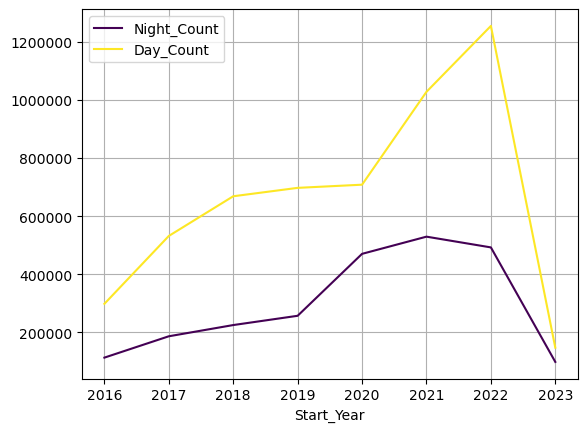

In [16]:
day_night_df.plot(x="Start_Year",kind="line",grid=True,colormap='viridis')
plt.ticklabel_format(style='plain')

plt.savefig("outputs/NigthtvDay.png")
plt.show()

In [17]:
#Adding total accidents to DF
total_accident = day_night_df[["Night_Count","Day_Count"]].sum(axis=1)
day_night_df["Total_Count"] = total_accident

In [18]:
#adding percentage of night v. day accidents
day_percent = (day_night_df["Day_Count"]/day_night_df["Total_Count"]) * 100
night_percent = (day_night_df["Night_Count"]/day_night_df["Total_Count"]) * 100

day_night_df["Night_Pct"] = night_percent
day_night_df["Day_Pct"] = day_percent

day_night_df

,Start_Year,Night_Count,Day_Count,Total_Count,Night_Pct,Day_Pct
0,2016,112742,298048,410790,27.445167,72.554833
1,2017,186263,531794,718057,25.939863,74.060137
2,2018,224905,668504,893409,25.173801,74.826199
3,2019,256833,697447,954280,26.913799,73.086201
4,2020,470174,708362,1178536,39.894751,60.105249
5,2021,529367,1028195,1557562,33.986897,66.013103
6,2022,492367,1255189,1747556,28.174605,71.825395
7,2023,97944,147014,244958,39.983997,60.016003


In [19]:
#Calling Census API
base_url = "https://api.census.gov/data/2021/acs/acs5?get=NAME,B01003_001E&for=place:*&in=state:*"
api_url = f"{base_url}&key={census_api}"
json_url = requests.get(api_url).json()
print(api_url)

https://api.census.gov/data/2021/acs/acs5?get=NAME,B01003_001E&for=place:*&in=state:*&key=9adc74e4cfc4d4a300ce521d201d867bcab7e31a


In [20]:
#Creating DataFrame from API
api_df = pd.DataFrame(json_url)
api_df

,0,1,2,3
0,NAME,B01003_001E,state,place
1,"Abanda CDP, Alabama",231,01,00100
2,"Abbeville city, Alabama",2231,01,00124
3,"Adamsville city, Alabama",4381,01,00460
4,"Addison town, Alabama",697,01,00484
...,...,...,...,...
31904,"Voladoras comunidad, Puerto Rico",696,72,87638
31905,"Yabucoa zona urbana, Puerto Rico",6466,72,87863
31906,"Yauco zona urbana, Puerto Rico",15404,72,88035
31907,"Yaurel comunidad, Puerto Rico",927,72,88121


In [21]:
#renaming column headers
api_df.columns=["City","Population","State #","Place #"]

In [22]:
#drop original column
drop = api_df.drop([0,0])

In [23]:
#Splitting City and State
split_cl = drop["City"].str.split(',',expand=True)

In [24]:
#Renaming Column Header
split_cl.columns=["City_1","State",""]
split_cl

,City_1,State,
1,Abanda CDP,Alabama,None
2,Abbeville city,Alabama,None
3,Adamsville city,Alabama,None
4,Addison town,Alabama,None
5,Akron town,Alabama,None
...,...,...,...
31904,Voladoras comunidad,Puerto Rico,None
31905,Yabucoa zona urbana,Puerto Rico,None
31906,Yauco zona urbana,Puerto Rico,None
31907,Yaurel comunidad,Puerto Rico,None


In [25]:
df =pd.concat([drop,split_cl],axis=1)
drop_df = df.drop([""],axis=1)
drop_df.head()

,City,Population,State #,Place #,City_1,State
1,"Abanda CDP, Alabama",231,01,00100,Abanda CDP,Alabama
2,"Abbeville city, Alabama",2231,01,00124,Abbeville city,Alabama
3,"Adamsville city, Alabama",4381,01,00460,Adamsville city,Alabama
4,"Addison town, Alabama",697,01,00484,Addison town,Alabama
5,"Akron town, Alabama",385,01,00676,Akron town,Alabama


In [26]:
#creating function to trim spaces
def trim(raw):
    trim = raw.strip()
    return trim

In [27]:
#Trimming space on State Column
drop_df["State"]= drop_df["State"].map(trim)

In [28]:
#renaming columns
census_rename_df = drop_df.rename(columns={"City":"City_State","City_1":"City"})
census_rename_df.head()

,City_State,Population,State #,Place #,City,State
1,"Abanda CDP, Alabama",231,01,00100,Abanda CDP,Alabama
2,"Abbeville city, Alabama",2231,01,00124,Abbeville city,Alabama
3,"Adamsville city, Alabama",4381,01,00460,Adamsville city,Alabama
4,"Addison town, Alabama",697,01,00484,Addison town,Alabama
5,"Akron town, Alabama",385,01,00676,Akron town,Alabama


In [29]:
#reordering columns
organized_census_df = census_rename_df[["City","State","Population","State #","Place #","City_State" 
]]
organized_census_df.head()

,City,State,Population,State #,Place #,City_State
1,Abanda CDP,Alabama,231,01,00100,"Abanda CDP, Alabama"
2,Abbeville city,Alabama,2231,01,00124,"Abbeville city, Alabama"
3,Adamsville city,Alabama,4381,01,00460,"Adamsville city, Alabama"
4,Addison town,Alabama,697,01,00484,"Addison town, Alabama"
5,Akron town,Alabama,385,01,00676,"Akron town, Alabama"


In [30]:
#Pulling City and excluding Puerto Rico
census_clean_df = organized_census_df[(organized_census_df["City"].str.contains("city")) \
                                      & (organized_census_df["State"] != "Puerto Rico")]
census_clean_df

,City,State,Population,State #,Place #,City_State
2,Abbeville city,Alabama,2231,01,00124,"Abbeville city, Alabama"
3,Adamsville city,Alabama,4381,01,00460,"Adamsville city, Alabama"
6,Alabaster city,Alabama,33133,01,00820,"Alabaster city, Alabama"
7,Albertville city,Alabama,22268,01,00988,"Albertville city, Alabama"
8,Alexander City city,Alabama,14765,01,01132,"Alexander City city, Alabama"
...,...,...,...,...,...,...
31572,Riverton city,Wyoming,10619,56,66220,"Riverton city, Wyoming"
31575,Rock Springs city,Wyoming,23505,56,67235,"Rock Springs city, Wyoming"
31580,Sheridan city,Wyoming,18660,56,69845,"Sheridan city, Wyoming"
31598,Torrington city,Wyoming,6196,56,77530,"Torrington city, Wyoming"


In [31]:
#converting population to integer
census_clean_df.loc[:,"Population"] = census_clean_df["Population"].astype(int)

C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\243609777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_clean_df.loc[:,"Population"] = census_clean_df["Population"].astype(int)
C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\243609777.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  census_clean_df.loc[:,"Population"] = census_clean_df["Population"].astype(int)


In [32]:
#Function to strip "city" from City
def strip(raw):
    city = raw.strip("city")
    trim = city.strip()
    return trim

In [33]:
census_clean_df.loc[:,"City2"] = census_clean_df["City"].map(strip)

C:\Users\arpitas\AppData\Local\Temp\ipykernel_651184\3544217579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_clean_df.loc[:,"City2"] = census_clean_df["City"].map(strip)


In [34]:
city_rename = census_clean_df.rename(columns={"City": "City1","City2": "City"})
city_rename

,City1,State,Population,State #,Place #,City_State,City
2,Abbeville city,Alabama,2231,01,00124,"Abbeville city, Alabama",Abbeville
3,Adamsville city,Alabama,4381,01,00460,"Adamsville city, Alabama",Adamsville
6,Alabaster city,Alabama,33133,01,00820,"Alabaster city, Alabama",Alabaster
7,Albertville city,Alabama,22268,01,00988,"Albertville city, Alabama",Albertville
8,Alexander City city,Alabama,14765,01,01132,"Alexander City city, Alabama",Alexander City
...,...,...,...,...,...,...,...
31572,Riverton city,Wyoming,10619,56,66220,"Riverton city, Wyoming",Riverton
31575,Rock Springs city,Wyoming,23505,56,67235,"Rock Springs city, Wyoming",Rock Springs
31580,Sheridan city,Wyoming,18660,56,69845,"Sheridan city, Wyoming",Sheridan
31598,Torrington city,Wyoming,6196,56,77530,"Torrington city, Wyoming",Torrington


In [35]:
#importing City and State abbrev.
crosswalk_path = "Resources/crosswalk.csv"
state_abv = pd.read_csv(crosswalk_path)

In [36]:
#merging abbriviation data to census
crosswalk_state = pd.merge(city_rename,state_abv,on="State")

In [37]:
rename_cross = crosswalk_state.rename(columns={"State":"State_old","Abbreviation":"State"})
rename_cross.head()

,City1,State_old,Population,State #,Place #,City_State,City,State
0,Abbeville city,Alabama,2231,01,00124,"Abbeville city, Alabama",Abbeville,AL
1,Adamsville city,Alabama,4381,01,00460,"Adamsville city, Alabama",Adamsville,AL
2,Alabaster city,Alabama,33133,01,00820,"Alabaster city, Alabama",Alabaster,AL
3,Albertville city,Alabama,22268,01,00988,"Albertville city, Alabama",Albertville,AL
4,Alexander City city,Alabama,14765,01,01132,"Alexander City city, Alabama",Alexander City,AL


In [38]:
sorted_og_traffic = organized_traffic_df.sort_values(by=["State","City"],ascending=True)
sorted_og_traffic.head()

,Start_Year,Start_Date,End_Year,End_Date,Start_Time,End_Time,Severity,City,State,Weather_Condition,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
523666,2022,2022-08-27,2022,2022-08-27,2022-08-27 14:47:41,2022-08-27 15:17:20,2,Abbeville,AL,Thunder in the Vicinity,...,True,False,False,False,False,False,False,False,False,False
530035,2022,2022-08-20,2022,2022-08-20,2022-08-20 16:32:02,2022-08-20 17:01:44,2,Abbeville,AL,Fair,...,False,False,False,False,False,False,False,False,False,False
536021,2022,2022-08-12,2022,2022-08-12,2022-08-12 20:30:17,2022-08-12 21:19:12,1,Abbeville,AL,Fair,...,True,False,False,False,False,False,False,False,False,False
548951,2022,2022-07-29,2022,2022-07-29,2022-07-29 06:38:49,2022-07-29 07:38:24,2,Abbeville,AL,Mostly Cloudy,...,False,False,False,False,False,False,False,False,False,False
557220,2022,2022-07-20,2022,2022-07-20,2022-07-20 12:57:22,2022-07-20 13:40:00,2,Abbeville,AL,Partly Cloudy,...,False,False,False,False,False,False,False,False,False,False


In [39]:
state_accidents = sorted_og_traffic.groupby(["Start_Year","State","City"]).count()

In [40]:
#resetting index on state_accidents
clean_reset_df = state_accidents.reset_index()
clean_reset_df

,Start_Year,State,City,Start_Date,End_Year,End_Date,Start_Time,End_Time,Severity,Weather_Condition,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,2016,AL,Ashville,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2016,AL,Athens,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2016,AL,Atmore,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2016,AL,Attalla,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,2016,AL,Auburn,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97722,2023,WY,Rock Springs,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
97723,2023,WY,Sinclair,36,36,36,36,36,36,33,...,36,36,36,36,36,36,36,36,36,36
97724,2023,WY,Wamsutter,77,77,77,77,77,77,29,...,77,77,77,77,77,77,77,77,77,77
97725,2023,WY,Wheatland,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [41]:
#merging Census and City Traffic data
state_city_accident_census = pd.merge(clean_reset_df,rename_cross,on=["State","City"],how="inner")
state_city_accident_census

,Start_Year,State,City,Start_Date,End_Year,End_Date,Start_Time,End_Time,Severity,Weather_Condition,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,City1,State_old,Population,State #,Place #,City_State
0,2016,AL,Ashville,1,1,1,1,1,1,1,...,1,1,1,1,Ashville city,Alabama,2096,01,02908,"Ashville city, Alabama"
1,2018,AL,Ashville,11,11,11,11,11,11,11,...,11,11,11,11,Ashville city,Alabama,2096,01,02908,"Ashville city, Alabama"
2,2019,AL,Ashville,8,8,8,8,8,8,8,...,8,8,8,8,Ashville city,Alabama,2096,01,02908,"Ashville city, Alabama"
3,2020,AL,Ashville,7,7,7,7,7,7,7,...,7,7,7,7,Ashville city,Alabama,2096,01,02908,"Ashville city, Alabama"
4,2021,AL,Ashville,18,18,18,18,18,18,15,...,18,18,18,18,Ashville city,Alabama,2096,01,02908,"Ashville city, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36919,2023,TX,Talco,1,1,1,1,1,1,1,...,1,1,1,1,Talco city,Texas,577,48,71732,"Talco city, Texas"
36920,2023,TX,Trenton,3,3,3,3,3,3,3,...,3,3,3,3,Trenton city,Texas,729,48,73592,"Trenton city, Texas"
36921,2023,WV,Follansbee,1,1,1,1,1,1,1,...,1,1,1,1,Follansbee city,West Virginia,2842,54,28204,"Follansbee city, West Virginia"
36922,2023,WV,McMechen,1,1,1,1,1,1,1,...,1,1,1,1,McMechen city,West Virginia,1667,54,50260,"McMechen city, West Virginia"


In [42]:
#simplifying columns
city_accident_census = state_city_accident_census[["State","City","Start_Year","Population","Start_Date"]]
city_accident_census.head()

,State,City,Start_Year,Population,Start_Date
0,AL,Ashville,2016,2096,1
1,AL,Ashville,2018,2096,11
2,AL,Ashville,2019,2096,8
3,AL,Ashville,2020,2096,7
4,AL,Ashville,2021,2096,18


In [43]:
#merging census and traffic data
census_traffic_df = pd.merge(reduced_traffic_df,rename_cross,on=["State","City"],how="inner")
census_traffic_df.head()

,Start_Time,End_Time,Severity,City,State,Weather_Condition,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Start_Date,End_Date,Start_Year,End_Year,City1,State_old,Population,State #,Place #,City_State
0,2016-02-08 05:46:00,2016-02-08 11:00:00,3,Dayton,OH,Light Rain,36.9,10.0,NaN,0.02,...,2016-02-08,2016-02-08,2016,2016,Dayton city,Ohio,138416,39,21000,"Dayton city, Ohio"
1,2016-02-08 07:23:34,2016-02-08 07:53:34,3,Dayton,OH,Mostly Cloudy,35.1,9.0,4.6,NaN,...,2016-02-08,2016-02-08,2016,2016,Dayton city,Ohio,138416,39,21000,"Dayton city, Ohio"
2,2016-02-08 07:39:07,2016-02-08 08:09:07,2,Dayton,OH,Mostly Cloudy,36.0,6.0,3.5,NaN,...,2016-02-08,2016-02-08,2016,2016,Dayton city,Ohio,138416,39,21000,"Dayton city, Ohio"
3,2016-02-08 07:59:35,2016-02-08 08:29:35,2,Dayton,OH,Overcast,34.0,7.0,3.5,NaN,...,2016-02-08,2016-02-08,2016,2016,Dayton city,Ohio,138416,39,21000,"Dayton city, Ohio"
4,2016-02-08 07:59:58,2016-02-08 08:29:58,3,Dayton,OH,Overcast,34.0,7.0,3.5,NaN,...,2016-02-08,2016-02-08,2016,2016,Dayton city,Ohio,138416,39,21000,"Dayton city, Ohio"


In [44]:
#renaming colums
census_accidents_pop =city_accident_census.rename(columns={"Start_Date":"Accidents"})
census_accidents_pop

,State,City,Start_Year,Population,Accidents
0,AL,Ashville,2016,2096,1
1,AL,Ashville,2018,2096,11
2,AL,Ashville,2019,2096,8
3,AL,Ashville,2020,2096,7
4,AL,Ashville,2021,2096,18
...,...,...,...,...,...
36919,TX,Talco,2023,577,1
36920,TX,Trenton,2023,729,3
36921,WV,Follansbee,2023,2842,1
36922,WV,McMechen,2023,1667,1


In [45]:
#Population per 100K
census_accidents_pop["pop_per_100K"] = census_accidents_pop["Population"]/100000
census_accidents_pop

,State,City,Start_Year,Population,Accidents,pop_per_100K
0,AL,Ashville,2016,2096,1,0.02096
1,AL,Ashville,2018,2096,11,0.02096
2,AL,Ashville,2019,2096,8,0.02096
3,AL,Ashville,2020,2096,7,0.02096
4,AL,Ashville,2021,2096,18,0.02096
...,...,...,...,...,...,...
36919,TX,Talco,2023,577,1,0.00577
36920,TX,Trenton,2023,729,3,0.00729
36921,WV,Follansbee,2023,2842,1,0.02842
36922,WV,McMechen,2023,1667,1,0.01667


In [46]:
#accidents per 100K population
census_accidents_pop["accidents_per_pop_100K"] = census_accidents_pop["Accidents"] / census_accidents_pop["pop_per_100K"]
census_accidents_pop

,State,City,Start_Year,Population,Accidents,pop_per_100K,accidents_per_pop_100K
0,AL,Ashville,2016,2096,1,0.02096,47.709924
1,AL,Ashville,2018,2096,11,0.02096,524.809160
2,AL,Ashville,2019,2096,8,0.02096,381.679389
3,AL,Ashville,2020,2096,7,0.02096,333.969466
4,AL,Ashville,2021,2096,18,0.02096,858.778626
...,...,...,...,...,...,...,...
36919,TX,Talco,2023,577,1,0.00577,173.310225
36920,TX,Trenton,2023,729,3,0.00729,411.522634
36921,WV,Follansbee,2023,2842,1,0.02842,35.186488
36922,WV,McMechen,2023,1667,1,0.01667,59.988002


In [47]:
#fitering on population >100K
major_cities = census_accidents_pop[census_accidents_pop["Population"]>=100000]

In [48]:
major_cities.sort_values(by=["accidents_per_pop_100K"],ascending=False)

,State,City,Start_Year,Population,Accidents,pop_per_100K,accidents_per_pop_100K
5112,FL,Miami,2022,440807,64505,4.40807,14633.388308
5111,FL,Miami,2021,440807,58816,4.40807,13342.800818
5317,FL,Orlando,2022,302968,36402,3.02968,12015.130311
5316,FL,Orlando,2021,302968,33014,3.02968,10896.860394
11119,LA,Baton Rouge,2021,225539,14552,2.25539,6452.099193
...,...,...,...,...,...,...,...
20377,TX,Amarillo,2016,200371,1,2.00371,0.499074
264,AR,Little Rock,2016,201893,1,2.01893,0.495312
31833,FL,Port St. Lucie,2018,202177,1,2.02177,0.494616
30516,TX,Lubbock,2023,255537,1,2.55537,0.391333


In [49]:
accidents_per_pop = (major_cities["Accidents"]/major_cities["Population"])

In [50]:
accident_by_city = major_cities.groupby(["Start_Year","State","City"])

accident_df = accident_by_city.first()
#accident_by_city.apply(display)
#accident_by_city.get_group((2022,"FL","Miami"))

In [65]:
accident_df.reset_index()

,Start_Year,State,City,Population,Accidents,pop_per_100K,accidents_per_pop_100K
0,2016,AL,Birmingham,202234,28,2.02234,13.845347
1,2016,AL,Mobile,187445,7,1.87445,3.734429
2,2016,AL,Montgomery,201022,13,2.01022,6.466954
3,2016,AR,Little Rock,201893,1,2.01893,0.495312
4,2016,AZ,Chandler,272439,85,2.72439,31.199645
...,...,...,...,...,...,...,...
2322,2023,WA,Tacoma,217332,149,2.17332,68.558703
2323,2023,WA,Vancouver,188331,88,1.88331,46.726243
2324,2023,WI,Green Bay,107083,59,1.07083,55.097448
2325,2023,WI,Madison,265447,188,2.65447,70.823931


In [226]:
#Author: Arpita Sharma
#Question: What cities had the greatest number of traffic accidents per population?

#First graph: Bar Graph, cities between 2016-2022 cities with pop over 100k had the highest average number of traffic accidents

#Restricting dataset to only include 2016-2022 data
major_cities_1622 = major_cities[major_cities["Start_Year"]!=2023]
major_cities_1622

#Getting the median number of traffic accidents per city
major_cities_1622_accidents_avg = major_cities_1622.groupby(["City","State"],as_index=False).mean()
major_cities_1622_accidents_avg

#Sorting to cities with the highest average number of accidents
major_cities_1622_accidents_avg_sorted = major_cities_1622_accidents_avg.sort_values(by=["accidents_per_pop_100K"], ascending=False)
major_cities_1622_accidents_avg_sorted

#Restricting data to top 10 cities
top_5_cities_1622 = major_cities_1622_accidents_avg_sorted[major_cities_1622_accidents_avg_sorted["accidents_per_pop_100K"]>=2600]
top_5_cities_1622


,City,State,Start_Year,Population,Accidents,pop_per_100K,accidents_per_pop_100K
159,Miami,FL,2019.0,440807.0,25933.428571,4.40807,5883.170769
191,Orlando,FL,2019.0,302968.0,15344.857143,3.02968,5064.844189
18,Baton Rouge,LA,2019.0,225539.0,10006.857143,2.25539,4436.863311
54,Columbia,SC,2019.0,137276.0,4887.285714,1.37276,3560.189483
215,Raleigh,NC,2019.0,462219.0,12018.428571,4.62219,2600.158923


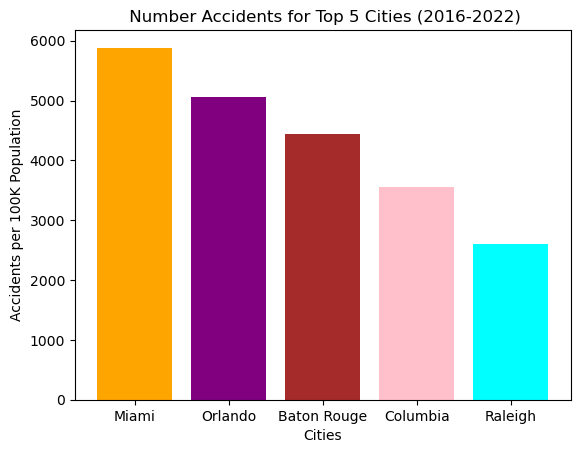

In [227]:
#Creating axis for plotting
x_axis = top_5_cities_1622["City"]
x_axis

y_axis = top_5_cities_1622["accidents_per_pop_100K"]
y_axis

# Define colors for each bar (use a list of colors)
colors = ['orange', 'purple', 'brown', 'pink', 'cyan', 'magenta']

#plotting bar charts
plt.bar(x_axis, y_axis,color=colors, align="center")

# Set x-axis labels and title
plt.xlabel('Cities')
plt.ylabel('Accidents per 100K Population')
plt.title(' Number Accidents for Top 5 Cities (2016-2022)')

#Save output png chart
plt.savefig("outputs/Accidents_Top5.png")
plt.show()

In [202]:
#Author: Arpita Sharma
#Question: What cities had the greatest number of traffic accidents per population?

#Second graph:Clustered Bar Graph, top 3 cities between 2016-2022 that had the greatest number of traffic accidents per pop 

#Now looking at accidents by year for major cities
major_cities_1622_accidents_by_year = major_cities_1622.groupby(["Start_Year","City","State"],as_index=False).sum()
major_cities_1622_accidents_by_year

#Sorting to look at cities with the highest number of accidents per year
major_cities_1622_accidents_by_year_sorted = major_cities_1622_accidents_by_year.sort_values(by=["accidents_per_pop_100K"], ascending=False)
major_cities_1622_accidents_by_year_sorted

#selecting to the top three cities here
miami_data = major_cities_1622_accidents_by_year_sorted[major_cities_1622_accidents_by_year_sorted["City"]=="Miami"]
miami_data

orlando_data = major_cities_1622_accidents_by_year_sorted[major_cities_1622_accidents_by_year_sorted["City"]=="Orlando"]
orlando_data

baton_rouge_data = major_cities_1622_accidents_by_year_sorted[major_cities_1622_accidents_by_year_sorted["City"]=="Baton Rouge"]
baton_rouge_data


,Start_Year,City,State,Population,Accidents,pop_per_100K,accidents_per_pop_100K
1480,2021,Baton Rouge,LA,225539,14552,2.25539,6452.099193
1775,2022,Baton Rouge,LA,225539,13683,2.25539,6066.799977
598,2018,Baton Rouge,LA,225539,11983,2.25539,5313.050071
1186,2020,Baton Rouge,LA,225539,11578,2.25539,5133.480241
892,2019,Baton Rouge,LA,225539,11313,2.25539,5015.983932
304,2017,Baton Rouge,LA,225539,6658,2.25539,2952.039337
17,2016,Baton Rouge,LA,225539,281,2.25539,124.590426


In [203]:
#adding top three cities to same dataset
top_3_cities_1622_by_year = pd.concat([miami_data, orlando_data, baton_rouge_data])
top_3_cities_1622_by_year

,Start_Year,City,State,Population,Accidents,pop_per_100K,accidents_per_pop_100K
1913,2022,Miami,FL,440807,64505,4.40807,14633.388308
1618,2021,Miami,FL,440807,58816,4.40807,13342.800818
1322,2020,Miami,FL,440807,27089,4.40807,6145.319834
442,2017,Miami,FL,440807,9220,4.40807,2091.618327
734,2018,Miami,FL,440807,8637,4.40807,1959.360899
1029,2019,Miami,FL,440807,8129,4.40807,1844.117720
149,2016,Miami,FL,440807,5138,4.40807,1165.589476
1944,2022,Orlando,FL,302968,36402,3.02968,12015.130311
1649,2021,Orlando,FL,302968,33014,3.02968,10896.860394
1353,2020,Orlando,FL,302968,11840,3.02968,3908.003486


In [204]:
#restricting dataset to only display data for accidents_per_pop_100K
accidents_by_pop_top_cities = top_3_cities_1622_by_year[["Start_Year","State","City","accidents_per_pop_100K"]]
accidents_by_pop_top_cities

,Start_Year,State,City,accidents_per_pop_100K
1913,2022,FL,Miami,14633.388308
1618,2021,FL,Miami,13342.800818
1322,2020,FL,Miami,6145.319834
442,2017,FL,Miami,2091.618327
734,2018,FL,Miami,1959.360899
1029,2019,FL,Miami,1844.117720
149,2016,FL,Miami,1165.589476
1944,2022,FL,Orlando,12015.130311
1649,2021,FL,Orlando,10896.860394
1353,2020,FL,Orlando,3908.003486


In [205]:
#storting to display by smallest year to biggest year
accidents_by_pop_top_cities_sorted = accidents_by_pop_top_cities.sort_values(by=["Start_Year"], ascending=True)
accidents_by_pop_top_cities_sorted

,Start_Year,State,City,accidents_per_pop_100K
17,2016,LA,Baton Rouge,124.590426
181,2016,FL,Orlando,1951.361200
149,2016,FL,Miami,1165.589476
442,2017,FL,Miami,2091.618327
474,2017,FL,Orlando,2423.688310
304,2017,LA,Baton Rouge,2952.039337
598,2018,LA,Baton Rouge,5313.050071
765,2018,FL,Orlando,2426.658921
734,2018,FL,Miami,1959.360899
1029,2019,FL,Miami,1844.117720


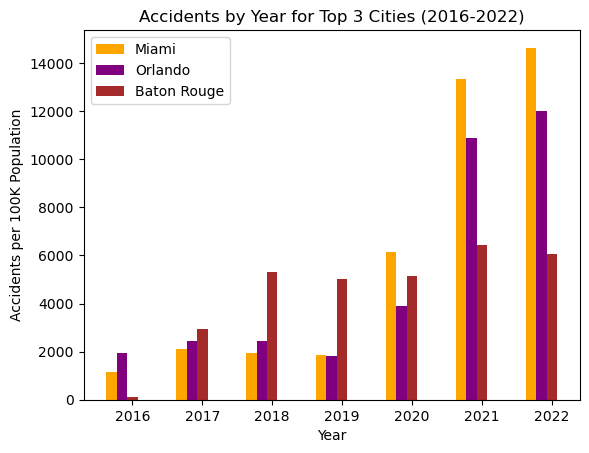

In [228]:

#creating variables for plotting
year= sorted(accidents_by_pop_top_cities_sorted["Start_Year"].unique())
miami_data_chart = accidents_by_pop_top_cities_sorted[accidents_by_pop_top_cities_sorted["City"] == "Miami"]["accidents_per_pop_100K"]
orlando_data_chart = accidents_by_pop_top_cities_sorted[accidents_by_pop_top_cities_sorted["City"] == "Orlando"]["accidents_per_pop_100K"]
baton_rouge_data_chart = accidents_by_pop_top_cities_sorted[accidents_by_pop_top_cities_sorted["City"] == "Baton Rouge"]["accidents_per_pop_100K"]

width = 0.15  # Adjust the width of the bars for clustering

# Create data for x-axis positions (shifted for clustered bars)
x = np.arange(len(year))

# Plot data in grouped manner of bar type
plt.bar(x - 2*width, miami_data_chart, width=width,color = "orange", label='Miami')
plt.bar(x - width, orlando_data_chart, width=width,color = "purple", label='Orlando')
plt.bar(x, baton_rouge_data_chart, width=width,color = "brown", label='Baton Rouge')


# Set x-axis labels and title
plt.xlabel('Year')
plt.ylabel('Accidents per 100K Population')
plt.xticks(x, year)
plt.title('Accidents by Year for Top 3 Cities (2016-2022)')

# Add a legend
plt.legend()

#save output png
plt.savefig("outputs/Accidents_Top3_By_Year.png")
plt.show()

# Show the chart
plt.show()